### For inline display of plots

In [1]:
%matplotlib inline

## Imports

In [2]:
import numpy as np
import pandas as pd

## Data Read

In [26]:
data = pd.read_csv("data.csv")
data["ID"].head(10)

0    6vFQfkVIyHglLHjv
1    6vFQfkVIyHglLHjv
2    6vFQfkVIyHglLHjv
3    6vFQfkVIyHglLHjv
4    6vFQfkVIyHglLHjv
5    6vFQfkVIyHglLHjv
6    1wyQjXUjUljiLEyP
7    1wyQjXUjUljiLEyP
8    1wyQjXUjUljiLEyP
9    1wyQjXUjUljiLEyP
Name: ID, dtype: object

## Taking the absolute of values to deal with negative values

In [27]:
columns = data.columns[2:8]
for i in columns:
    data[i] = data[i].abs()

## Calculating ratio of dosage for each type of drug

In [28]:
data['A'] = data['A_Payments']/data['A_Patients']
data["B"] = data["B_Payments"]/data["B_Patients"]
data["C"] = data["C_Payments"]/data["C_Patients"]

## Dropping unnecessary columns

In [29]:
columns = data.columns[1:8]
data.drop(columns, axis = 1, inplace = True)
data.head(10)

,ID,A,B,C
0,6vFQfkVIyHglLHjv,NaN,609.750000,1.0
1,6vFQfkVIyHglLHjv,114.000000,5.000000,NaN
2,6vFQfkVIyHglLHjv,NaN,1599.000000,NaN
3,6vFQfkVIyHglLHjv,120.000000,4.500000,NaN
4,6vFQfkVIyHglLHjv,NaN,652.423077,2.0
5,6vFQfkVIyHglLHjv,125.214286,1801.500000,NaN
6,1wyQjXUjUljiLEyP,1500.000000,14431.200000,461.0
7,1wyQjXUjUljiLEyP,8.000000,636.125000,37.0
8,1wyQjXUjUljiLEyP,NaN,8187.600000,NaN
9,1wyQjXUjUljiLEyP,21.571429,97.333333,12.0


## Grouing the data based on ID values
For rows with same ID, values for corresponding columns is equal to their mean

In [30]:
data1=data.groupby("ID").mean().reset_index()
# data1.loc[['wwyJwO6CL1dqIooh']]

## Replacing infinite values with max value
Grouping resulted in infinite values. So replacing such value with its column's max value

In [31]:
columns = data1.columns
for i in columns:
    data1[i].replace([np.inf],max(data1[i].replace(np.inf, np.nan)),inplace=True)

## Plotting the prescription ratios to identify limits

### For Drug A

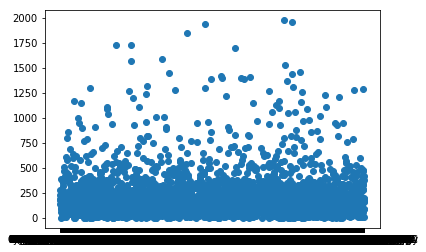

In [20]:
aplot = data1.loc[data1["A"] < 2000]
plt.scatter(x=aplot["ID"], y=aplot["A"])
plt.show()

### For Drug B

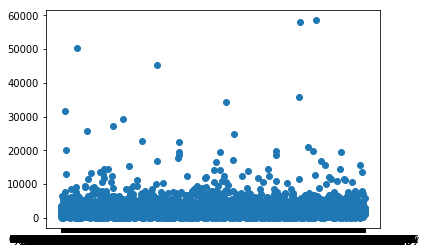

In [21]:
plt.scatter(x=data1["ID"], y=data1["B"])
plt.show()

### For Drug C

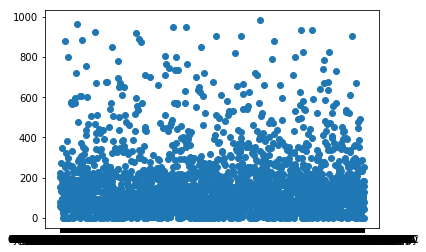

In [14]:
import matplotlib.pyplot as plt
cplot = data1.loc[data1["C"] < 1000]
plt.scatter(x=oplot["ID"], y=cplot["C"])
plt.show()

## Classifying the providers based on prescription ratio limits
- If the prescription for atleast two types of drugs is above optimal limits, then "Over prescribing"
- If only Drug C has prescription ratio above limit, then "High Pain Killers"

In [37]:
limit_A = 750
limit_B = 1000
limit_C = 500
def nature(row):
    if ((row["A"] > limit_A) + (row["B"] > limit_B) + (row["C"] > limit_C) >1):
        return "Over Prescribing"
    elif row["C"] > limit_C:
        return "High Pain Killers"
    else:
        return "Normal"
data1["nature"] = data1.apply(nature, axis=1)


In [39]:
high_pain_killers = np.array(data1.loc[data1["nature"] == "High Pain Killers"]["ID"])
over_prescribing = np.array(data1.loc[data1["nature"] == "Over Prescribing"]["ID"])
# print(high_pain_killers)
# print(high_drugs)

In [ ]:
# 